# Cryptonians #
_**Project Group 2**_

---
## Contents

1. [Data](#Data)
  1. [Load](#Load)
  2. [Explore](#Explore)
  3. [Transformation](#Transformation)
2. [Training](#Training)
3. [Summary](#Summary)

## Data
Place holder for description



### Load
Place holder for description

In [1]:
import boto3
import botocore
import sagemaker
import sys
import pandas as pd
import io
from datetime import datetime
import numpy as np


bucket = 'ads-bucket-senichol'   # <--- specify a bucket you have access to
prefix = 'kaggle-crypto-data/RCF'

# I am overwriting the bucket and prefix variables since I can't write to Scott's bucket
bucket = 'sagemaker-davidrob'
prefix = 'group-project/bitcoin'

execution_role = sagemaker.get_execution_role()


# check if the bucket exists
try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your S3 bucket'
          ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == '403':
        print("Hey! You don't have permission to access the bucket, {}.".format(bucket))
    elif e.response['Error']['Code'] == '404':
        print("Hey! Your bucket, {}, doesn't exist!".format(bucket))
    else:
        raise
else:
    print('Training input/output will be stored in: s3://{}/{}'.format(bucket, prefix))

Training input/output will be stored in: s3://sagemaker-davidrob/group-project/bitcoin


In [2]:
# Step 1: get the bitcoin minute-by-minute data from kaggle (one way or another)
# https://www.kaggle.com/mczielinski/bitcoin-historical-data
# https://www.kaggle.com/mczielinski/bitcoin-historical-data#bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv
    
#import pandas as pd
#!pip install kaggle
#!kaggle datasets download -d mczielinski/bitcoin-historical-data
#!mkdir bitcoin-historical-data
#!mv bitcoin-historical-data.zip /bitcoin-historical-data
#!unzip -a /bitcoin-historical-data/bitcoin-historical-data.zip
#df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv', encoding="ISO-8859-1", low_memory=False)

# Either run the lines above this comment or do something like the lines below.

# I saved and unzipped the file to my instance via the above lines, but ran into some difficulty reading it. 
# I tried messing with the path a bit, and then gave up and just read the data from my own S3 bucket

# s3 = boto3.client('s3')
# raw_data = s3.get_object(Bucket=bucket, Key=f'group-project/bitcoin/bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv')
# df = pd.read_csv(io.BytesIO(raw_data['Body'].read()), encoding="ISO-8859-1", low_memory=False)

# Alternatively, read from project folder
df =  pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2018-06-27.csv") 

### Explore
Place holder for description

In [3]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.405857e+06,3.405857e+06,3.405857e+06,3.405857e+06,3.405857e+06,3.405857e+06,3.405857e+06,3.405857e+06
mean,1.427701e+09,1.535757e+03,1.537163e+03,1.534153e+03,1.535739e+03,1.101862e+01,1.533527e+04,1.535645e+03
std,5.915861e+07,3.037551e+03,3.041014e+03,3.033519e+03,3.037511e+03,3.500616e+01,7.259934e+04,3.037272e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.376406e+09,1.228200e+02,1.228900e+02,1.227600e+02,1.228100e+02,4.767414e-01,7.732200e+01,1.228200e+02
50%,1.427882e+09,4.167300e+02,4.168700e+02,4.165600e+02,4.167200e+02,2.157220e+00,4.738905e+02,4.167000e+02
75%,1.478970e+09,8.094000e+02,8.099700e+02,8.089900e+02,8.094800e+02,8.931947e+00,4.197468e+03,8.093700e+02
max,1.530058e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


### Transformation
Place holder for description



#### Remove Missing Value

In [4]:
# Remove NA
df.dropna(how='any')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000


#### Date time feature generation

In [5]:
# Step 2: Add day and hour data elements to the dataframe so we can group by days and hours in later analysis


# create various date formats for grouping later on
df['Time'] = pd.to_datetime(df['Timestamp'], unit = 's', infer_datetime_format = 'True')
df['Date'] = df['Time'].values.astype('datetime64[D]')
df['Hour'] = df['Time'].values.astype('datetime64[h]')
df['Minute'] = df['Time'].values.astype('datetime64[m]')

df.drop(columns=['Time', 'Timestamp'])

# reality check - make sure the dataframe looks right so far.
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time,Date,Hour,Minute
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:53:00,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:54:00,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:55:00,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:56:00,2011-12-31,2011-12-31 07:00:00,2011-12-31 07:56:00


In [6]:
# Step 3: Show some charts
import matplotlib.pyplot as plt
# plot the minute-by-minute data
plt.subplot(221)
df['Volume_(BTC)'].plot(legend=True)
plt.title('Trading Volume, by minute')

plt.subplot(222)
df['Close'].plot( legend=True)
plt.title('Closing Price, by minute')

plt.subplot(223)
df['High'].plot(legend=True)
plt.title('High Price, by minute')

plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

plt.show()


<Figure size 640x480 with 3 Axes>

#### Aggregate by date

In [20]:
# Step 4: group minute-by-minute data points by day to view the standard deviation of the features in the array below
# df_transform = df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Weighted_Price'].agg(['min', 'max', 'std','mean'])
df_groupby = df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'].agg(['min', 'max', 'std','mean'])
# removing '2018-06-27' because I know these values contain NA values and can't be used for training data.
# df_std = df_std[df_std.index != '2018-06-27']

# renaming columns
df_groupby.columns = ['Open_min','Open_max','Open_std','Open_mean',\
                      'High_min','High_max','High_std','High_mean', \
                      'Low_min','Low_max','Low_std','Low_mean',\
                      'Close_min','Close_max','Close_std','Close_mean',\
                      'Vol_BTC_min','Vol_BTC_max','Vol_BTC_std','Vol_BTC_mean',\
                      'Vol_Currency_min','Vol_Currency_max','Vol_Currency_std','Vol_Currency_mean',\
                      'Wt_Price_min','Wt_Price_max','Wt_Price_std','Wt_Price_mean']

# only 2,367 data elements in this dataframe
print(df_groupby.shape)
# df_groupby.head()
df_groupby.describe()

(2368, 28)


,Open_min,Open_max,Open_std,Open_mean,High_min,High_max,High_std,High_mean,Low_min,Low_max,...,Vol_BTC_std,Vol_BTC_mean,Vol_Currency_min,Vol_Currency_max,Vol_Currency_std,Vol_Currency_mean,Wt_Price_min,Wt_Price_max,Wt_Price_std,Wt_Price_mean
count,2368.000000,2368.000000,2367.000000,2368.000000,2368.000000,2368.000000,2367.000000,2368.000000,2368.000000,2368.000000,...,2367.000000,2368.000000,2368.000000,2.368000e+03,2367.000000,2368.000000,2368.000000,2368.000000,2367.000000,2368.000000
mean,1471.343674,1594.217373,28.754174,1536.670359,1474.282580,1595.604607,28.642632,1538.075386,1469.201182,1592.239130,...,26.644910,11.042641,87.386706,4.341289e+05,29111.856419,15384.776937,1471.422947,1594.088667,28.770256,1536.556323
std,2881.854383,3175.707727,81.676950,3036.796252,2888.516571,3178.478143,81.325773,3040.268635,2878.396098,3170.709672,...,21.056891,8.887354,2944.878656,7.675410e+05,55177.050092,37228.936359,2882.112070,3175.228283,81.685035,3036.514866
min,3.800000,4.380000,0.000000,4.328903,3.800000,4.380000,0.000000,4.328903,1.500000,4.380000,...,0.236352,0.333540,0.000000,6.000000e+00,1.704544,2.057071,3.800000,4.380000,0.000000,4.328903
25%,118.295000,125.130000,0.834915,122.838089,118.407500,125.130000,0.831698,122.890481,117.760000,125.112500,...,13.708088,5.373613,0.491707,4.748237e+04,3017.089388,991.506395,118.095957,125.112804,0.838932,122.833814
50%,408.295000,422.370000,2.899077,416.363757,409.135000,422.400000,2.902781,416.494396,407.235000,422.370000,...,20.743492,8.560639,2.579456,1.401348e+05,8548.530553,2659.305155,408.774454,422.370000,2.930358,416.375524
75%,786.032500,830.175000,11.758791,811.115167,787.732500,830.350000,11.639957,811.613557,785.000000,829.640000,...,33.600570,13.988587,5.012679,3.890178e+05,21786.753492,7771.478061,785.717857,830.036817,11.762217,811.119846
max,18492.000000,19665.760000,836.715679,19189.771083,18621.810000,19666.000000,827.634032,19204.559312,18465.000000,19649.960000,...,341.879912,104.504766,142706.803850,5.483271e+06,505925.178970,536217.694927,18495.292527,19663.298888,835.459423,19186.169610


#### Log Transform
not needed

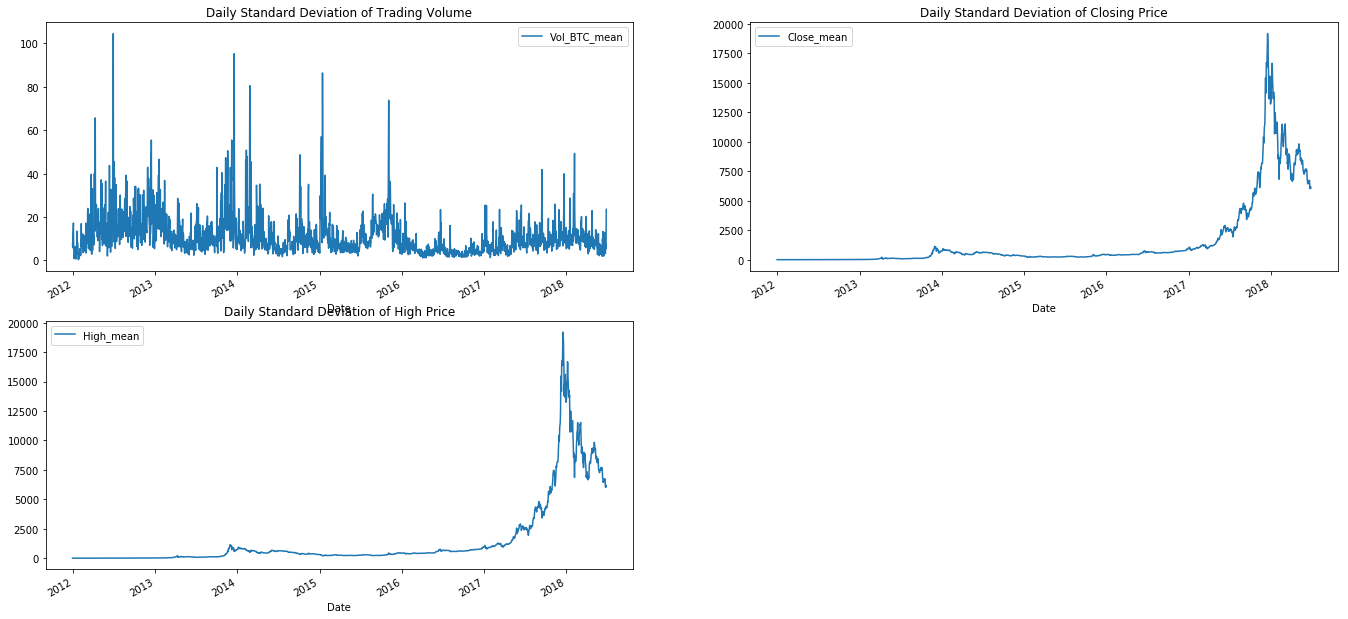

In [18]:
# Step 5: same charts, but using the standard deviation data when minute-level daata is grouped by day
# plotting the daily volatility measures
plt.subplot(221)
df_groupby['Vol_BTC_mean'].plot(legend=True)
plt.title('Daily Standard Deviation of Trading Volume')

plt.subplot(222)
df_groupby['Close_mean'].plot(legend=True)
plt.title('Daily Standard Deviation of Closing Price')

plt.subplot(223)
df_groupby['High_mean'].plot(legend=True)
plt.title('Daily Standard Deviation of High Price')

plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

plt.show()


In [ ]:
# # Step 6: same charts, but using the standard deviation data when minute-level data is grouped by hour

# #df_std_hourly = df.groupby(['Hour']).std()
# df_std_hourly = df.groupby(['Hour'])['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Weighted_Price'].std()
# #df_std_hourly = df_std_hourly[df_std_hourly.index > '2012-06-20']  # standard deviations are all zero before this date

# # plots
# plt.subplot(221)
# df_std_hourly['Volume_(BTC)'].plot(legend=True)
# plt.title('Hourly Standard Deviation of Trading Volume')

# plt.subplot(222)
# df_std_hourly['Close'].plot(legend=True)
# plt.title('Hourly Standard Deviation of Closing Price')

# plt.subplot(223)
# df_std_hourly['High'].plot(legend=True)
# plt.title('Hourly Standard Deviation of High Price')

# plt.subplots_adjust(left=0.01, right = 3, wspace=0.2, bottom = 0.1, top=2)

# plt.show()

### Training
Place holder for description

In [21]:
# Step 7: create the random cut forest object, defining two parameters: num_samples_per_tree and num_trees.
# This will generate a model using the daily standard deviation dataframe

# I don't have the ability to write to Scott's S3 bucket, so I am writing to my own for now.

from sagemaker import RandomCutForest

session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.c5.xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=100,
                      num_trees=100)
# automatically upload the training data to S3 and run the training job

rcf.fit(rcf.record_set(df_groupby.values))

INFO:sagemaker:Creating training-job with name: randomcutforest-2018-10-03-03-44-40-740


2018-10-03 03:44:40 Starting - Starting the training job...
Launching requested ML instances......
Preparing the instances for training......
2018-10-03 03:46:45 Downloading - Downloading input data
2018-10-03 03:46:53 Training - Downloading the training image...
2018-10-03 03:47:36 Uploading - Uploading generated training model
2018-10-03 03:47:42 Failed - Training job failed

Docker entrypoint called with argument(s): train
[10/03/2018 03:47:32 INFO 139643009484608] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_ftp_port': 8999, u'num_samples_per_tree': 256, u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'_log_level': u'info', u'_kvstore': u'dist_async', u'force_dense': u'true', u'epochs': 1, u'num_trees': 100, u'eval_metrics': [u'accuracy', u'precision_recall_fscore'], u'_num_kv_servers': u'auto', u'mini_batch_size': 1000}
[10/03/2018 03:47:32 INFO 139643009484608] Reading provided configuration from /

ValueError: Error training randomcutforest-2018-10-03-03-44-40-740: Failed Reason: ClientError: Unable to read data channel 'train'. Found missing (NaN) values. Please remove any missing (NaN) values in the input data. (caused by MXNetError)

Caused by: [03:47:32] /opt/brazil-pkg-cache/packages/AIAlgorithmsCppLibs/AIAlgorithmsCppLibs-1.0.200854.0/RHEL5_64/generic-flavor/src/data_iter/src/sanitizers.h:36: (Input Error) (NaN) NaN value encountered in the feature list 'dat_values'.

Stack trace returned 10 entries:
[bt] (0) /opt/amazon/lib/libaialgsdataiter.so(_ZN4dmlc15LogMessageFatalD1Ev+0x29) [0x7f012a383c69]
[bt] (1) /opt/amazon/lib/libaialgsdataiter.so(_ZNK6aialgs2io21FailNaNValueSanitizerIdLi0EE8SanitizeERKNS0_11FeatureListEd+0x97) [0x7f012a393a67]
[bt] (2) /opt/amazon/lib/libaialgsdataiter.so(_ZN6aialgs2io11DenseBufferIdE5WriteERKNS0_11FeatureListE+0x73) [0x7f012a3946b3]
[bt] (3) /opt/amazon/lib/libaialgsdataiter.so(_ZN6aialgs2io5Batch14WriteToBuffersERKNS0_7ExampleE+0x121) [0x7f012a392761]
[bt] (4) /opt/amazon/lib/libaialgsdataiter.so(_ZN6aialgs2io5Batch5WriteERKNS0_7ExampleE+0x1c) 

It takes a few minutes for the training instance to become available.

Don't worry about the output text above turning red. That's not an indication of an error.

You can view the status of a training job using the AWS SageMaker console. Just click on the "Jobs" tab and select training job matching the training job name, below.
https://console.aws.amazon.com/sagemaker/home?region=us-east-1#/jobs

If you see the message 

> `Billable seconds: nn`

at the end of the output in the box above, that means training successfully completed and the output RCF model was stored in the specified output path.

Building the model with the daily standard deviation data took about 5 minutes and 60 billable seconds.

In [22]:
# Step 8: another reality check, confirming the name of the new training job. Not very helpful, atcually.
print('Training job name: {}'.format(rcf.latest_training_job.job_name))

Training job name: randomcutforest-2018-10-03-03-44-40-740


In [23]:
# Step 9:  spin up endpoint instances for generating anamaly scores. 
# At this point, we're just starting the endpoint machines, which takes some time.

rcf_inference = rcf.deploy(
    initial_instance_count=1,
    instance_type='ml.c5.xlarge',
)

INFO:sagemaker:Creating model with name: randomcutforest-2018-10-03-03-48-25-199


ClientError: An error occurred (ValidationException) when calling the CreateModel operation: Could not find model data at s3://sagemaker-davidrob/group-project/bitcoin/output/randomcutforest-2018-10-03-03-44-40-740/output/model.tar.gz.

Building the endpoint also takes some time. 5 or 10 minutes.

You can confirm the endpoint configuration and status by navigating to the "Endpoints" tab in the AWS SageMaker console and selecting the endpoint matching the endpoint name, below.  (https://console.aws.amazon.com/sagemaker/home?region=us-east-1#/endpoints)

In [ ]:
# Step 10: getting ready to send data to the endpoint so that it will spit out anomaly scores

from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [ ]:
# Step 11: Here we take the original data and reformat it according to the format we just specified in step 10.
df_std_numpy = df_std.as_matrix()

# reality check - what do the first few items in this array matrix like?
print(df_std_numpy[:6])

In [ ]:
# Step 12: We generated anomaly scores for the daily std_dev records. let's look at them.

results = rcf_inference.predict(df_std_numpy)
scores = [datum['score'] for datum in results['scores']]

# add scores to daily std_dev dataframe and print first few values
df_std['score'] = pd.Series(scores, index=df_std.index)
df_std.head()

In [ ]:
df_std.describe()

In [ ]:
# Step 13: Plot the anomaly scores along with some features from the daily std_dev data

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#https://matplotlib.org/2.0.2/api/colors_api.html

ax1.plot(df_std['Volume_(BTC)'], color='r', alpha=0.8)
ax1.plot(df_std['High'], color='b', alpha=0.8)
ax2.plot(df_std['score'], color='g', alpha=0.5)

ax1.grid(which='major', axis='both')

ax1.set_ylabel('Bitcoin Trading Volume, std_dev', color='b')
ax2.set_ylabel('Anomaly Score', color='g')

ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='g')

ax1.set_ylim(0, 900)
ax2.set_ylim(min(scores), 1.2*max(scores))
fig.set_figwidth(10)


In [ ]:
# Step 14: Anomalies are defined as scores greater than 2.5 standard deviations fronm the mean of score.

score_mean = df_std['score'].mean()
score_std = df_std['score'].std()
score_cutoff = score_mean + 2.5*score_std

anomalies = df_std[df_std['score'] > score_cutoff]
print("At a 2.5 sd threshhold, there are " + str(len(anomalies.score)) + " anomalies.")
anomalies.head()

In [ ]:
# Step 15: Add the anomalies to the plot.

ax2.plot(anomalies.index, anomalies.score, 'ko')
fig
# high anomaly scores are highly concentrated around the end of 2017/beginning of 2018.

In [ ]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

In [ ]:
#Step 16:  We are now starting over with minute-level data, all 3.4 million of them
from sagemaker import RandomCutForest
df_minute_inferences = df[['Minute','Open', 'Close', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
df_minute_inferences = df_subset.set_index(pd.DatetimeIndex(df_subset['Minute']).values)
df_minute_inferences = df_subset.drop(columns = ['Minute'])
session = sagemaker.Session()

# specify general training job information
rcf_minute = RandomCutForest(role=execution_role,
                      train_instance_count=1,
                      train_instance_type='ml.c5.4xlarge',
                      data_location='s3://{}/{}/'.format(bucket, prefix),
                      output_path='s3://{}/{}/output'.format(bucket, prefix),
                      num_samples_per_tree=200,
                      num_trees=500)
# automatically upload the training data to S3 and run the training job
rcf_minute.fit(rcf_minute.record_set(df_minute_inferences.values))

As it did at step 10, it will take a few minutes for the training instance to become available.

Building the model with the minute-level data took about 10 minutes and 135 billable seconds.

In [ ]:
# Step 17:  spin up endpoint instances for generating anamaly scores. 
# We're creating multiple endpoints to process the 3.4 million minute-level records

rcf_inference = rcf_minute.deploy(
    initial_instance_count=1,
    instance_type='ml.c5.4xlarge',
)

In [ ]:
# Step 18: define the file format for sending the data to the endpoint for inference calculations

from sagemaker.predictor import csv_serializer, json_deserializer

rcf_inference.content_type = 'text/csv'
rcf_inference.serializer = csv_serializer
rcf_inference.accept = 'application/json'
rcf_inference.deserializer = json_deserializer

In [ ]:
# Step 19: generate anomaly scores using the endpoints.
# This section has been failing. Let's try breaking it up into ~340 chunks of 10,000 records 

df_minute_inferences_numpy = df_subset.as_matrix()

from collections import defaultdict
results = defaultdict(list)



# this function splits the dataset into subsets of n records each
def get_every_n(a, n=2):
    counter = 0
    print("Starting " + str((a.shape[0] // n) + 1) + " inference batches.")
    for i in range((a.shape[0] // n) + 1):
        if (counter == 10):
            print(i)
            counter = 0
        yield a[n*i:n*(i+1)]
        counter += 1

for subset in get_every_n(df_minute_inferences_numpy,10000):
    subset_results = rcf_inference.predict(subset)
    for score in subset_results['scores']:
        results['scores'].append(score)

# reality check - how many scores did we generate?
print("Completed " + str(len(results['scores']) + " inferences in " + str(counter) + " batches of " + n + " records each.")

In [ ]:
# Step 20: With the anomaly scores in 'results', we now add them to the original dataframe, df_subset

scores = [datum['score'] for datum in results['scores']]

# add scores to minute-level data frame and print first few values
df_minute_inferences['score'] = pd.Series(scores, index=df_minute_inferences.index)
df_minute_inferences.head()

In [ ]:
# Step 21: Delete the endpoint(s). They're expensive.

sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

In [ ]:
# Step 22: save the inferences to a csv on S3. This way we don't have to redo steps 16-21, which take 30 to 60 minutes.

from io import StringIO
csv_buffer = StringIO()
df_minute_inferences.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'minute_level_inferences.csv').put(Body=csv_buffer.getvalue())

In [ ]:
# Step 23: Optional if you want to load a saved copy of the minute-level inferences instead of regenerating everything in 16-21

raw_data = s3.get_object(Bucket=bucket, Key=f'minute_level_inferences.csv')
df_minute_inferences = pd.read_csv(io.BytesIO(raw_data['Body'].read()), encoding="ISO-8859-1", low_memory=False)
df_minute_inferences.head()

In [ ]:
# Step 24: Plot the anomaly scores along with some features from the minute-level inferences

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#https://matplotlib.org/2.0.2/api/colors_api.html

ax1.plot(df_minute_inferences['Volume_(BTC)'], color='r', alpha=0.8)
ax1.plot(df_minute_inferences['High'], color='b', alpha=0.8)
ax2.plot(df_minute_inferences['score'], color='g', alpha=0.5)

ax1.grid(which='major', axis='both')

ax1.set_ylabel('Bitcoin Trading Volume, std_dev', color='b')
ax2.set_ylabel('Anomaly Score', color='g')

ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='g')

ax1.set_ylim(0, 20000)
ax2.set_ylim(min(df_minute_inferences['score']), 1.2*max(df_minute_inferences['score']))
fig.set_figwidth(10)

In [ ]:
# Step 25: Anomalies are defined as scores greater than 2.5 standard deviations fronm the mean of score.

score_mean = df_minute_inferences['score'].mean()
score_std = df_minute_inferences['score'].std()
score_cutoff = score_mean + 3*score_std

anomalies = df_minute_inferences[df_minute_inferences['score'] > score_cutoff]
print("At a 3 sd threshhold, there are " + str(len(anomalies.score)) + " anomalies.")
anomalies.head()

In [ ]:
# Step 15: Add the anomalies to the plot.

ax2.plot(anomalies.index, anomalies.score, 'ko')
fig


We've gone from too few anomalies to too many.

### Summary
Place holder for description